In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [6]:
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [7]:
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


In [8]:
correlation = df.corr()
print(correlation['Grades'].sort_values(ascending=False))

Grades                 1.000000
Study Hours            0.810807
Socioeconomic Score    0.335033
Attendance (%)         0.321930
Sleep Hours           -0.124689
Name: Grades, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

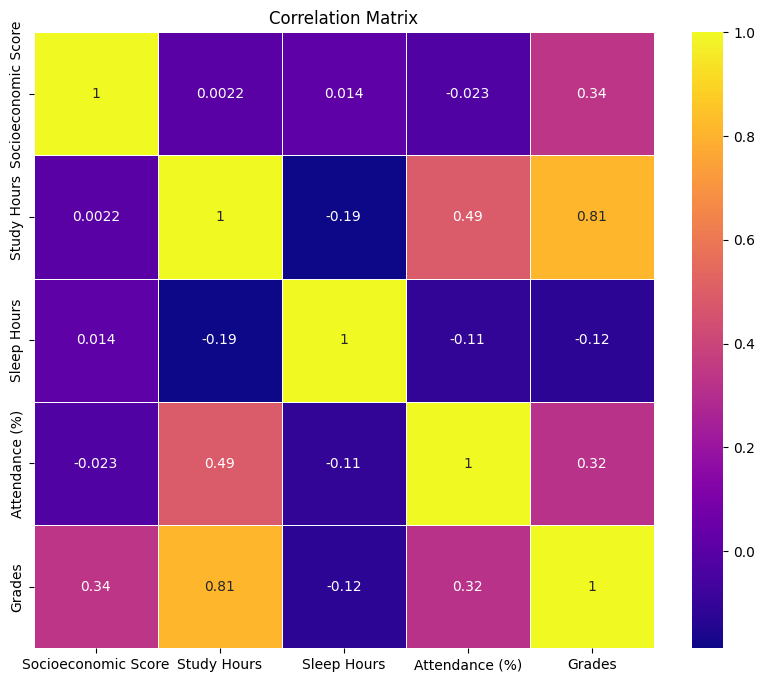

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='plasma', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Grades'])
y = df['Grades']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance)

               Feature  Importance
1          Study Hours    0.738746
0  Socioeconomic Score    0.249694
2          Sleep Hours    0.006268
3       Attendance (%)    0.005292


In [17]:
df['study_sleep_ratio'] = df['Study Hours'] / (df['Sleep Hours'] + 1e-5)
df['attendance_study'] = df['Attendance (%)'] * df['Study Hours']

In [18]:
def socio_group(score):
    if score < 0.33:
        return 'low'
    elif score < 0.66:
        return 'medium'
    else:
        return 'high'

df['socio_group'] = df['Socioeconomic Score'].apply(socio_group)

In [19]:
df = pd.get_dummies(df, columns=['socio_group'], drop_first=True)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Socioeconomic Score']] = scaler.fit_transform(
    df[['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Socioeconomic Score']]
)

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Grades'])
y = df['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Training features shape: (1110, 8)
Test features shape: (278, 8)
